# assign 6

In [25]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

## 1

### a

In [26]:
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### b

In [27]:
df = pd.DataFrame(california.data, columns=california.feature_names)

### c

In [28]:
correlation_matrix = df.corr().round(3)
print(correlation_matrix)

            MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000    -0.119     0.327     -0.062       0.005     0.019   
HouseAge    -0.119     1.000    -0.153     -0.078      -0.296     0.013   
AveRooms     0.327    -0.153     1.000      0.848      -0.072    -0.005   
AveBedrms   -0.062    -0.078     0.848      1.000      -0.066    -0.006   
Population   0.005    -0.296    -0.072     -0.066       1.000     0.070   
AveOccup     0.019     0.013    -0.005     -0.006       0.070     1.000   
Latitude    -0.080     0.011     0.106      0.070      -0.109     0.002   
Longitude   -0.015    -0.108    -0.028      0.013       0.100     0.002   

            Latitude  Longitude  
MedInc        -0.080     -0.015  
HouseAge       0.011     -0.108  
AveRooms       0.106     -0.028  
AveBedrms      0.070      0.013  
Population    -0.109      0.100  
AveOccup       0.002      0.002  
Latitude       1.000     -0.925  
Longitude     -0.925      1.000  


### d

In [29]:
df['MEDV'] = california.target

### e

In [30]:
corr_values = correlation_matrix
min_corr_variable = corr_values.idxmin(axis=1).min()
max_corr_variable = corr_values.idxmax(axis=1).max()
print(f"Variable with minimum self-correlation: {min_corr_variable}")
print(f"Variable with maximum self-correlation: {max_corr_variable}")

Variable with minimum self-correlation: AveBedrms
Variable with maximum self-correlation: Population


In [31]:
x = df[[min_corr_variable, max_corr_variable]]
y = df['MEDV']

### f

In [32]:
x_train_70, x_test_30, y_train_70, y_test_30 = train_test_split(x, y, test_size=0.3, random_state=42)

### g

In [33]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train_70, y_train_70)
y_pred_70_30 = model.predict(x_test_30)

### h

In [34]:
mse = mean_squared_error(y_test_30, y_pred_70_30)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_30, y_pred_70_30)

performance_metrics = [mse, rmse, r2]
print(f"Performance Metrics: MSE = {mse}, RMSE = {rmse}, R2 Score = {r2}")

Performance Metrics: MSE = 2.639526709041061, RMSE = 1.6246620291743945, R2 Score = -1.0110065157836554


## 2

In [35]:
x_train_60, x_test_40, y_train_60, y_test_40 = train_test_split(x, y, test_size=0.4, random_state=42)
x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
model_60_40 = DecisionTreeRegressor(random_state=42)
model_60_40.fit(x_train_60, y_train_60)
y_pred_60_40 = model_60_40.predict(x_test_40)
mse_60_40 = mean_squared_error(y_test_40, y_pred_60_40)
rmse_60_40 = np.sqrt(mse_60_40)
r2_60_40 = r2_score(y_test_40, y_pred_60_40)
performance_metrics_60_40 = [mse, rmse, r2]
print(f"mse, rmse, r2 for 60/40 split ratio : {performance_metrics_60_40}")

mse, rmse, r2 for 60/40 split ratio : [2.639526709041061, 1.6246620291743945, -1.0110065157836554]


In [37]:
# Train a DecisionTreeRegressor model using the 80/20 split
model_80_20 = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model_80_20.fit(x_train_80, y_train_80)

# Predict the values for the test set
y_pred_80_20 = model_80_20.predict(x_test_20)

# Calculate the Mean Squared Error
mse_80_20 = mean_squared_error(y_test_20, y_pred_80_20)

# Calculate the Root Mean Squared Error
rmse_80_20 = np.sqrt(mse_80_20)

# Calculate the R-squared score
r2_80_20 = r2_score(y_test_20, y_pred_80_20)

# Save the performance metrics in a list
performance_metrics_80_20 = [mse_80_20, rmse_80_20, r2_80_20]

# Print the performance metrics
print(f"mse, rmse, r2 for 80/20 split ratio : {performance_metrics_80_20}")

mse, rmse, r2 for 80/20 split ratio : [2.668278684598946, 1.6334866649590214, -1.0362182562125435]


## 3

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf_mse = []
rf_rmse = []
rf_r2 = []

In [42]:
rf_model_70_30 = RandomForestRegressor(random_state=42)
rf_model_70_30.fit(x_train_70, y_train_70)
y_pred_70_30_rf = rf_model_70_30.predict(x_test_30)
_mse = mean_squared_error(y_test_30, y_pred_70_30_rf)
rf_mse.append(_mse)
rf_rmse.append(np.sqrt(_mse))
rf_r2.append(r2_score(y_test_30, y_pred_70_30_rf))

In [43]:
# Create and fit the RandomForestRegressor model for the 60/40 split
rf_model_60_40 = RandomForestRegressor(random_state=42)
rf_model_60_40.fit(x_train_60, y_train_60)

# Make predictions for the test set
y_pred_60_40_rf = rf_model_60_40.predict(x_test_40)

# Calculate performance metrics
_mse_60_40 = mean_squared_error(y_test_40, y_pred_60_40_rf)
rf_mse.append(_mse_60_40)
rf_rmse.append(np.sqrt(_mse_60_40))
rf_r2.append(r2_score(y_test_40, y_pred_60_40_rf))

In [44]:
# Create and fit the RandomForestRegressor model for the 80/20 split
rf_model_80_20 = RandomForestRegressor(random_state=42)
rf_model_80_20.fit(x_train_80, y_train_80)

# Make predictions for the test set
y_pred_80_20_rf = rf_model_80_20.predict(x_test_20)

# Calculate performance metrics
_mse_80_20 = mean_squared_error(y_test_20, y_pred_80_20_rf)
rf_mse.append(_mse_80_20)
rf_rmse.append(np.sqrt(_mse_80_20))
rf_r2.append(r2_score(y_test_20, y_pred_80_20_rf))

## 4

In [48]:
import matplotlib.pyplot as plt

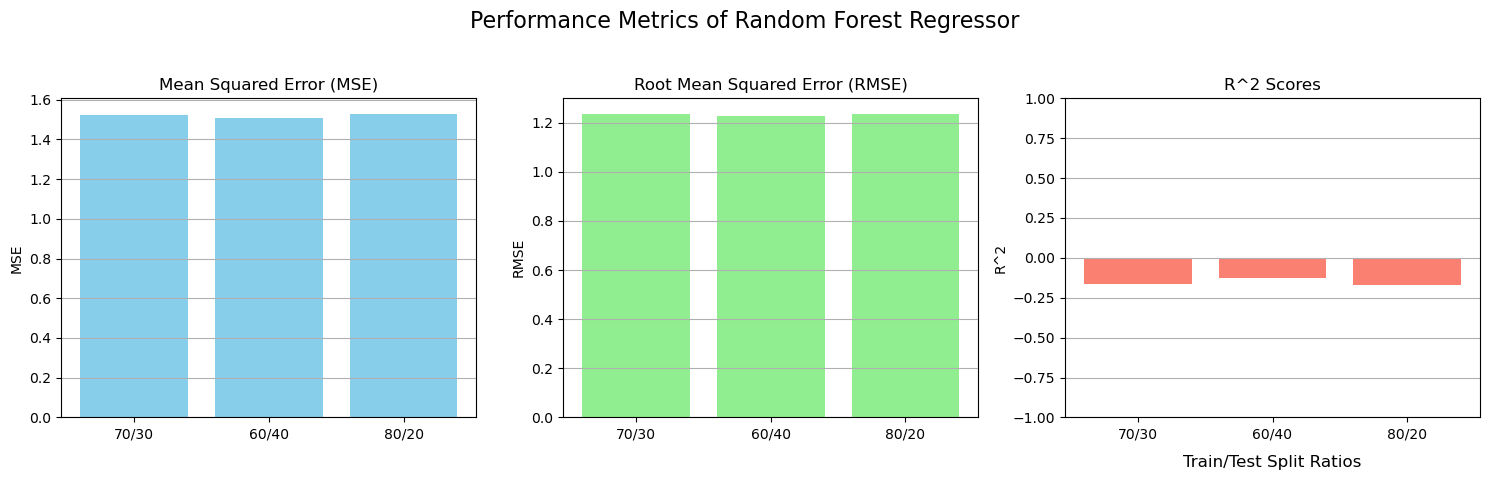

In [58]:
split_ratios = ['70/30', '60/40', '80/20']

split_ratios = ['70/30', '60/40', '80/20']

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Mean Squared Error
axs[0].bar(split_ratios, rf_mse, color='skyblue')
axs[0].set_title('Mean Squared Error (MSE)')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y')

# Plot Root Mean Squared Error
axs[1].bar(split_ratios, rf_rmse, color='lightgreen')
axs[1].set_title('Root Mean Squared Error (RMSE)')
axs[1].set_ylabel('RMSE')
axs[1].grid(axis='y')

# Plot R^2 Scores
axs[2].bar(split_ratios, rf_r2, color='salmon')
axs[2].set_title('R^2 Scores')
axs[2].set_ylabel('R^2')
axs[2].set_ylim(-1, 1)  # Set limits for R^2 score
axs[2].grid(axis='y')

# Add common x-label for all subplots
plt.xlabel('Train/Test Split Ratios', fontsize=12, labelpad=10)

# Adjust spacing between plots and add a title for the entire figure
plt.suptitle('Performance Metrics of Random Forest Regressor', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()